In [6]:
# started 10-30-2025

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf


import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
X_train = pd.read_csv("../normalized split data/X_train.csv")
X_test = pd.read_csv("../normalized split data/X_test.csv")
y_train = pd.read_csv("../normalized split data/y_train.csv")
y_test = pd.read_csv("../normalized split data/y_test.csv")

In [4]:
X_train.head()

,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
0,0.729943,0.103343,-0.306948,-0.070161,-0.271251,1.288017,0.154438
1,1.309252,-1.605737,-0.306948,-1.074095,-1.601398,-0.916982,0.767691
2,1.329067,-0.430744,-0.306948,-0.680834,-1.012663,0.284322,0.651397
3,0.962344,0.637431,-0.306948,-0.098546,0.104404,1.514898,-0.930010
4,0.193632,0.103343,-0.306948,1.207180,0.610423,-0.107723,-0.098976


In [5]:
y_train.head()

,FIRE_SIZE
0,0.301030
1,1.918197
2,2.712774
3,0.477121
4,0.477121


<Axes: ylabel='Count'>

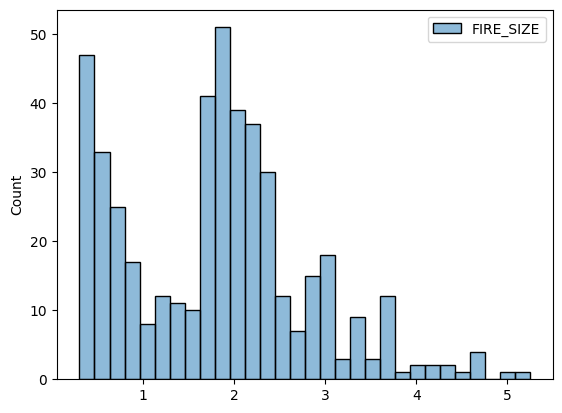

In [ ]:
sns.histplot(data=y_test, bins=30, kde=False)


<Axes: ylabel='Count'>

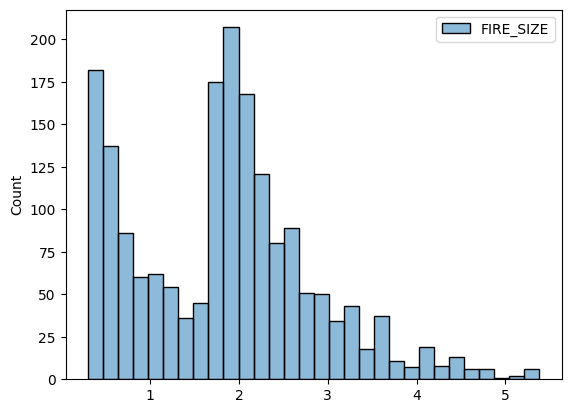

In [7]:
sns.histplot(data=y_train, bins=30, kde=False)


In [8]:
y_train.describe()

,FIRE_SIZE
count,1814.000000
mean,1.823494
std,1.027105
min,0.301030
25%,0.905771
50%,1.875061
75%,2.387087
max,5.380586


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.layers import Normalization
from tensorflow.keras.optimizers import Adam

In [10]:
# SHALLOW MLP

In [11]:
mlp_model = Sequential([
    Dense(28, activation="relu"),
    
    Dense(1)
])

In [12]:
optimizer = Adam(learning_rate=0.0005)
mlp_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [13]:
history = mlp_model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_split=0.1,
    verbose=1
)

Epoch 1/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.9546 - mae: 1.6791 - val_loss: 3.1854 - val_mae: 1.4427
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6728 - mae: 1.3340 - val_loss: 2.5013 - val_mae: 1.2705
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2486 - mae: 1.2151 - val_loss: 2.0549 - val_mae: 1.1616
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7059 - mae: 1.0531 - val_loss: 1.8020 - val_mae: 1.0984
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6157 - mae: 1.0317 - val_loss: 1.6561 - val_mae: 1.0621
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3514 - mae: 0.9469 - val_loss: 1.5734 - val_mae: 1.0398
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2715 - mae: 0.9088 - val_loss: 1.5213 - val_mae: 1.0215
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1044 - mae: 0.8562 - val_loss: 1.4819 - val_mae: 1.0068
Epoch 9/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1284 - mae: 

In [14]:
mlp_loss = mlp_model.evaluate(X_test, y_test)
print(f"Test loss mae: {mlp_loss[1]}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0009 - mae: 0.7801 
Test loss mae: 0.7908759713172913


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Axes: ylabel='Count'>

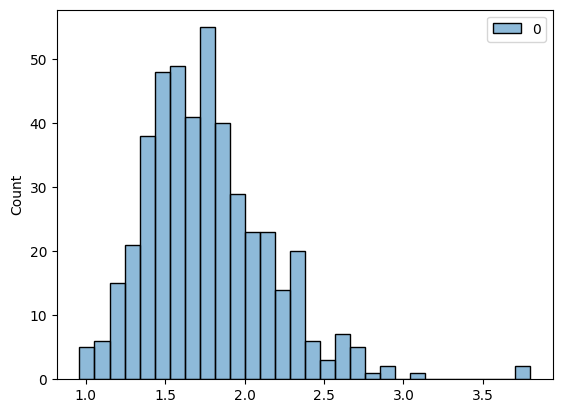

In [15]:
sns.histplot(data=mlp_model.predict(X_test), bins=30, kde=False)


In [16]:
# LINEAR REGRESSION

In [17]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
linear_model = LinearRegression()

In [19]:
linear_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
linear_y_pred = linear_model.predict(X_test)

In [21]:
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_mae = mean_absolute_error(y_test, linear_y_pred)

linear_r2 = r2_score(y_test, linear_y_pred)

In [22]:
print(f"test mean Squared Error: {linear_mse:.3f}")
print(f"test mean Absolute Error: {linear_mae:.3f}")

print(f"test r2 Score: {linear_r2:.3f}")

test mean Squared Error: 0.965
test mean Absolute Error: 0.777
test r2 Score: 0.065


In [24]:
linear_y_pred_tr = linear_model.predict(X_train)

linear_mse_tr = mean_squared_error(y_train, linear_y_pred_tr)
linear_mae_tr = mean_absolute_error(y_train, linear_y_pred_tr)

linear_r2_tr = r2_score(y_train, linear_y_pred_tr)

print(f"train mean Squared Error: {linear_mse_tr:.3f}")
print(f"train mean Absolute Error: {linear_mae_tr:.3f}")

print(f"train r2 Score: {linear_r2_tr:.3f}")

train mean Squared Error: 0.960
train mean Absolute Error: 0.768
train r2 Score: 0.089


<Axes: ylabel='Count'>

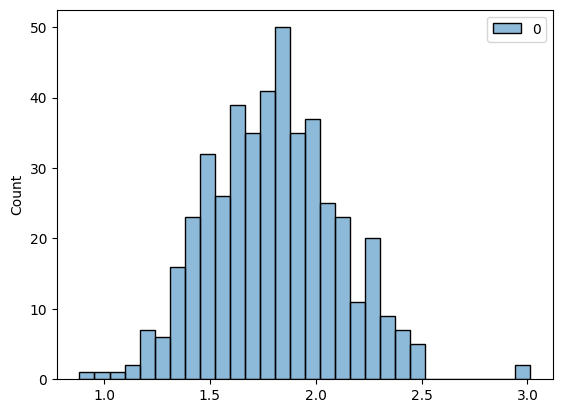

In [131]:
sns.histplot(data=linear_y_pred, bins=30, kde=False)


In [132]:
# XGBOOST

In [26]:
from xgboost import XGBRegressor


In [27]:
xgb_model = XGBRegressor(
    n_estimators=10000,      # number of boosting rounds (trees)
    learning_rate=0.001,
    max_depth=6,           # maximum depth of each tree
    subsample=0.8,         # fraction of samples used per tree
    colsample_bytree=0.8,  # fraction of features used per tree
    random_state=5    
)

# with these hyperparams, the test set loss plateaus.
# the loss graph is weird because as complexity increases the training loss decreases quickly but the test loss never increases, it just decreases slower
# best to stop training when test loss plateus in this case
# strong regularization with xgboost, probably because of the subsample and colsample_bytree helping it generalize


In [28]:
xgb_model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [29]:
xgb_y_pred = xgb_model.predict(X_test)

In [30]:
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f"test MAE: {xgb_mae:.3f}")
print(f"test R2: {xgb_r2:.3f}")

test MAE: 0.707
test R2: 0.199


In [31]:
xgb_y_pred_tr = xgb_model.predict(X_train)

xgb_mae_tr = mean_absolute_error(y_train, xgb_y_pred_tr)
xgb_r2_tr = r2_score(y_train, xgb_y_pred_tr)

print(f"train MAE: {xgb_mae_tr:.3f}")
print(f"train R2: {xgb_r2_tr:.3f}")

train MAE: 0.350
train R2: 0.801


<Axes: ylabel='Count'>

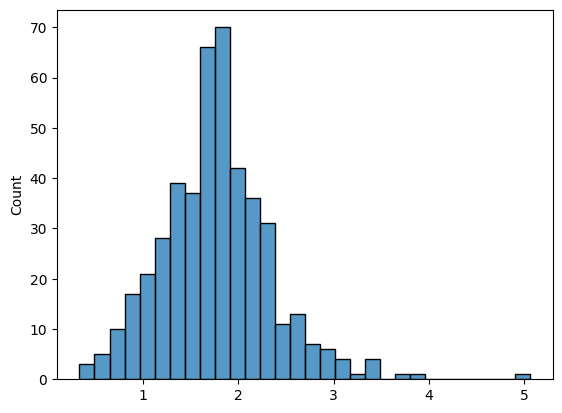

In [177]:
sns.histplot(data=xgb_y_pred, bins=30, kde=False)


In [140]:
# DECISION TREE

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
tree_model = DecisionTreeRegressor(random_state=5, criterion="absolute_error", splitter="best", max_depth=5, 
                                   min_samples_split=5)

In [34]:
tree_model.fit(X_train, y_train)

,criterion,'absolute_error'
,splitter,'best'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [35]:
tree_y_pred = tree_model.predict(X_test)


In [37]:
tree_mae = mean_absolute_error(y_test, tree_y_pred)
print("test tree MAE:", tree_mae)

test tree MAE: 0.7794524109457653


In [38]:
tree_y_pred_tr = tree_model.predict(X_train)
tree_mae_tr = mean_absolute_error(y_train, tree_y_pred_tr)
print("train tree MAE:", tree_mae_tr)


train tree MAE: 0.7036112766032788


<Axes: ylabel='Count'>

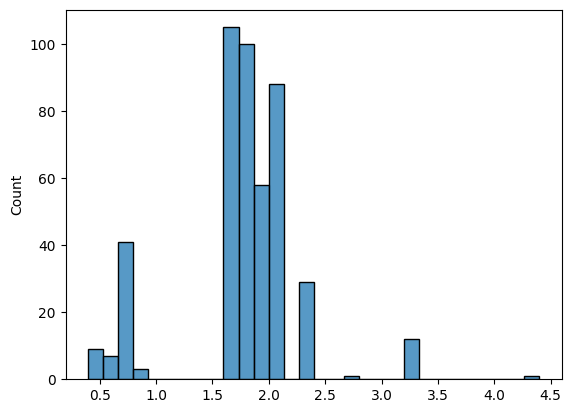

In [146]:
sns.histplot(data=tree_y_pred, bins=30, kde=False)


In [147]:
# RANDOM FOREST

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=3, random_state=5, n_jobs=-1) # n jobs is num cpu cores, -1 means all

In [42]:
rf_model.fit(X_train, y_train)

c:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,500
,criterion,'squared_error'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
rf_y_pred = rf_model.predict(X_test)

In [44]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)

rf_r2  = r2_score(y_test, rf_y_pred)

print(f"test MSE: {rf_mse:.4f}\ntest R2: {rf_r2:.4f}\ntest MAE: {rf_mae:.4f}")

test MSE: 0.9490
test R2: 0.0805
test MAE: 0.7680


In [45]:
#check training loss to mke sure it doesn't overfit

rf_y_pred2 = rf_model.predict(X_train)

rf_mse2 = mean_squared_error(y_train, rf_y_pred2)
rf_mae2 = mean_absolute_error(y_train, rf_y_pred2)

rf_r22  = r2_score(y_train, rf_y_pred2)

print(f"train MSE: {rf_mse2:.4f}\ntrain R2: {rf_r22:.4f}\ntrain MAE: {rf_mae2:.4f}")

train MSE: 0.8976
train R2: 0.1487
train MAE: 0.7406
